### Student Information
Name: 劉丞侑 (Cheng-You Liou)

Student ID: 114065536

GitHub ID: ChengYou-Liou

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

## Data preparation

In [1]:
### Begin Assignment Here
import pandas as pd
import numpy as np
import helpers.data_mining_helpers as dmh


In [9]:
df = pd.read_csv('newdataset/Reddit-stock-sentiment.csv')
#Check the type of the dataframe
print(type(df))
#Check the shape of the dataframe
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
(847, 16)


Print the first 3 samples of the dataset

In [3]:
df[0:3]

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0


In [98]:
df[-5:]

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label,quarter
842,comment,2021-06-30 04:06:06,h3iv6pq,stockstobuytoday,$MRIN Marin Software killed it today. Hope som...,Ordinary-Office9180,https://www.reddit.com/r/stockstobuytoday/comm...,1,NaN,NaN,Invest now it is going to shoot up tomorrow,0.0,0.0,0.0,['tomorrow'],1.0,2021Q2
843,comment,2025-04-11 05:01:24,mmijiuz,StockMarket,$ U.S. dollar value (crashing),lulububudu,https://i.redd.it/atvlo83gk4ue1.jpeg,2,NaN,NaN,Where can I read this?,0.0,0.0,0.0,[],0.0,2025Q2
844,post,2025-03-24 12:30:39,1jipi4v,stockstobuytoday,Analyst Recommendations,saasfin,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.0,"Upgrades, Downgrades\n\n [Stock Analyst Recomm...",0.0,0.0,0.0,"['Analyst', 'Nasdaq', 'Stock', 'Upgrades', 'Do...",0.0,2025Q1
845,comment,2025-04-11 20:13:26,mmmely7,wallstreetbets,Weekend Discussion Thread for the Weekend of A...,yes_ur_wrong,https://www.reddit.com/r/wallstreetbets/commen...,10,NaN,NaN,i sold my puts so i expect cheeto to declare w...,0.0,0.0,0.0,"['war', 'denmark', 'cheeto', 'i']",-1.0,2025Q2
846,comment,2025-04-12 03:09:06,mmobyz1,wallstreetbets,Someone post the hotline please.,I_am_Nerman,https://i.redd.it/tcfuu97p7bue1.jpeg,1,NaN,NaN,![img](emote|t5_2th52|31224),0.0,0.0,0.0,"['img', ']', '[', 'emote|t5_2th52|31224']",0.0,2025Q2


In [4]:
df[:10][["author", "title", "sentiment"]]

,author,title,sentiment
0,StickyTip420,Retardation is on the menu boys! WSB is so back,-1.0
1,Comfortable-Dog-8437,Retail giant TARGET has now declined for 10 co...,1.0
2,Btankersly66,How do you feel about a sitting president maki...,0.0
3,emiljenfn,Who knows more? $VMAR,1.0
4,Just-Big6411,The Trump administration is begging Xi Jinping...,0.0
5,PolarNimbus,Weekend Discussion Thread for the Weekend of A...,1.0
6,stoniey84,Is the market in complete denial right now?,-1.0
7,OSRSkarma,Retardation is on the menu boys! WSB is so back,1.0
8,Blondbox,"It's fucking awful seeing the ""Silver"" misinfo...",1.0
9,Zumuru,Any cheap stocks under $10?,0.0


### Missing Values

In [99]:
df.isnull().apply(lambda x: dmh.check_missing_values(x))

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label,quarter
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0,0,0,0,0,783,783,0,0,0,0,0,0,0


In [100]:
#df.dropna(inplace=True)
df.isnull().apply(lambda x: dmh.check_missing_values(x))

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label,quarter
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0,0,0,0,0,783,783,0,0,0,0,0,0,0


Too many NaN in downvotes and upvote_ratio columns, so we keep those rows containing them

In [101]:
print(df.shape)

(847, 17)


### Duplicate Data

In [102]:
df.duplicated()
sum(df.duplicated())

0

## Data Preprocessing

### Sampling

In [12]:
df_sample = df.sample(n=200)

In [15]:
df_sample[0:5]

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
493,comment,2025-04-11 16:06:47,mml193r,stocks,US consumer sentiment plummets to second-lowes...,Wonderful_Honey_1726,https://www.reddit.com/r/stocks/comments/1jwr3...,1,NaN,NaN,"Yes, you’re very sexist, you even said as much...",0.600000,0.566667,1.0,"['Harris', 'man', 'day', 't', 'charge', 'conve...",0.0
518,comment,2025-04-11 9:52:45,mmjccq1,stocks,r/Stocks Daily Discussion & Fundamentals Frida...,Ok_Employment_192,https://www.reddit.com/r/stocks/comments/1jwlr...,1,NaN,NaN,I'm reading now about 125% retaliatory tariffs...,0.669345,-0.084821,-1.0,"['news', '..', 'stage', 'reaction', 'cash', '%...",0.0
250,post,2024-10-21 14:31:33,1g8r349,stockstobuytoday,New company on the CSE Syntheia Corp $SYAI.CN,Bright-Ad-1329,https://www.reddit.com/r/stockstobuytoday/comm...,50,0.0,0.99,"Hey everyone, i was looking into a new company...",0.526771,0.150321,1.0,"['incoming', 'manage', 'Corp', 'service', 'way...",1.0
836,post,2025-03-26 12:18:30,1jkadvn,stockstobuytoday,Futures Market,saasfin,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.00,"how does the futures market look today\n\nSPY,...",0.377083,0.062500,1.0,"['Natural', 'stockbuyvest.com', 'Gold', 'marke...",0.0
239,comment,2025-04-11 13:24:23,mmk508z,StockMarket,"Trump is surrounded by a bunch of idiots, he s...",autfaciam,https://i.redd.it/c2mmpy3qf7ue1.png,1,NaN,NaN,And himself along maybe? At least nobody can b...,0.700000,-0.400000,-1.0,"['nobody', 'tan']",-1.0


In [16]:
import matplotlib.pyplot as plt
import plotly 

Print the samples based on the subreddit

subreddit
stocks              274
StockMarket         250
stockstobuytoday    174
wallstreetbets      149
Name: count, dtype: int64


<Axes: title={'center': 'Subreddit Distribution'}, xlabel='Subreddit', ylabel='Count'>

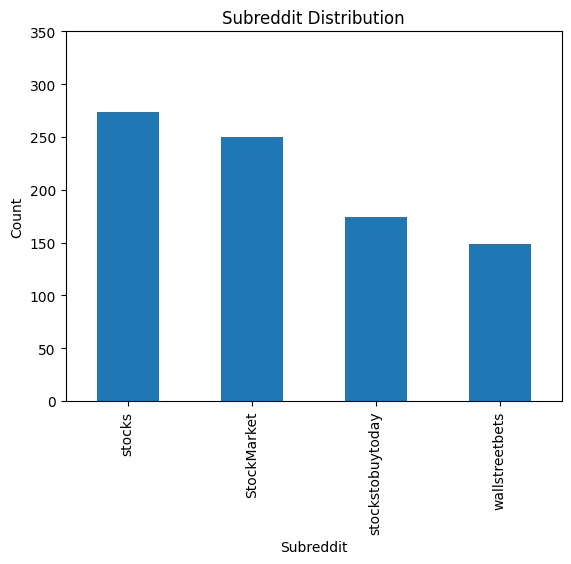

In [20]:
print(df.subreddit.value_counts())

df.subreddit.value_counts().plot(kind='bar',
                                 title='Subreddit Distribution',
                                 xlabel='Subreddit',
                                 ylabel='Count',
                                 ylim = [0, 350])

subreddit
stocks              65
StockMarket         55
stockstobuytoday    42
wallstreetbets      38
Name: count, dtype: int64


<Axes: title={'center': 'Subreddit Distribution'}, xlabel='Subreddit', ylabel='Count'>

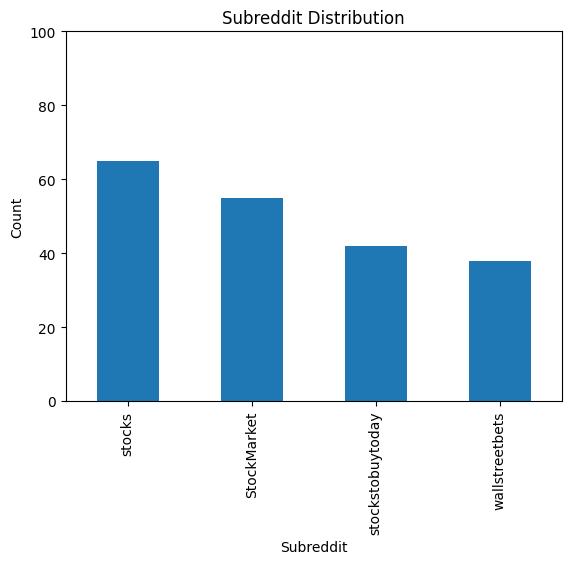

In [22]:
print(df_sample.subreddit.value_counts())

df_sample.subreddit.value_counts().plot(kind='bar',
                                 title='Subreddit Distribution',
                                 xlabel='Subreddit',
                                 ylabel='Count',
                                 ylim = [0, 100])

Print based on sentiment

sentiment
 0.0    331
 1.0    319
-1.0    197
Name: count, dtype: int64


<Axes: title={'center': 'Sentiment Distribution'}, xlabel='Sentiment', ylabel='Count'>

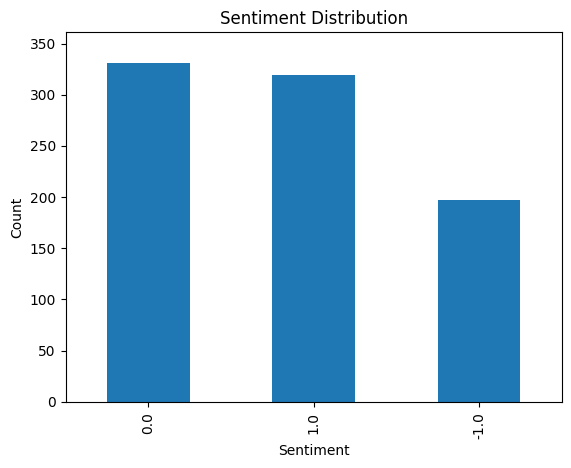

In [24]:
print(df.sentiment.value_counts())

df.sentiment.value_counts().plot(kind='bar',
                                 title='Sentiment Distribution',
                                 xlabel='Sentiment',
                                 ylabel='Count',
                                 ylim = [0, df.sentiment.value_counts().max() + 30])

sentiment
 1.0    85
 0.0    71
-1.0    44
Name: count, dtype: int64


<Axes: title={'center': 'Sentiment Distribution'}, xlabel='Sentiment', ylabel='Count'>

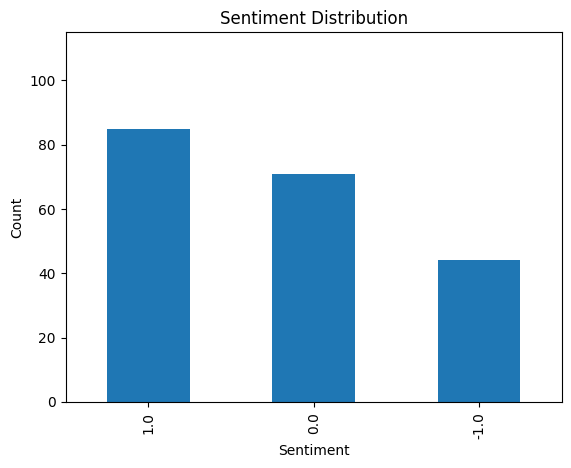

In [25]:
print(df_sample.sentiment.value_counts())

df_sample.sentiment.value_counts().plot(kind='bar',
                                 title='Sentiment Distribution',
                                 xlabel='Sentiment',
                                 ylabel='Count',
                                 ylim = [0, df_sample.sentiment.value_counts().max() + 30])

Do a side-by-side comparison 

<Axes: title={'center': 'Sentiment distribution'}, xlabel='sentiment'>

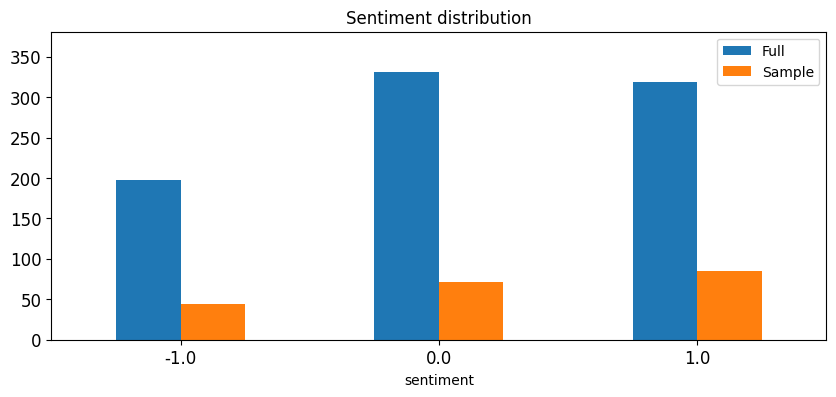

In [28]:
# Answer here
counts_sample = df_sample.sentiment.value_counts()
counts_full = df.sentiment.value_counts()

comparison = pd.DataFrame(
    {
        "Full":counts_full,
        "Sample":counts_sample, 
    }
)

comparison.plot(
    kind="bar",
    figsize=(10, 4),
    rot=0,
    fontsize=12,
    title="Sentiment distribution",
    ylim=[0, counts_full.max() + 50]
)

### Feature Creation

In [48]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(stop_words='english')
df_counts = count_vect.fit_transform(df.text)

In [49]:
analyze = count_vect.build_analyzer()
print(analyze("This is a sample sentence, showing off the stop words filtration."))

['sample', 'sentence', 'showing', 'stop', 'words', 'filtration']


In [50]:
analyze(df.text[20])

['nooo', 'dont', 'smug', 'bull', 'day']

In [51]:
df_counts.shape

(847, 4105)

In [52]:
count_vect.get_feature_names_out()[0:10]

array(['00', '000', '01378', '02', '027', '03', '06', '08', '10', '100'],
      dtype=object)

In [53]:
df_counts[100:105, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

Plot the heat map with seaborn

In [54]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(df.index)[0:20]]

plot_z = df_counts[0:20, 0:20].toarray() #X_counts[how many documents, how many terms]
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

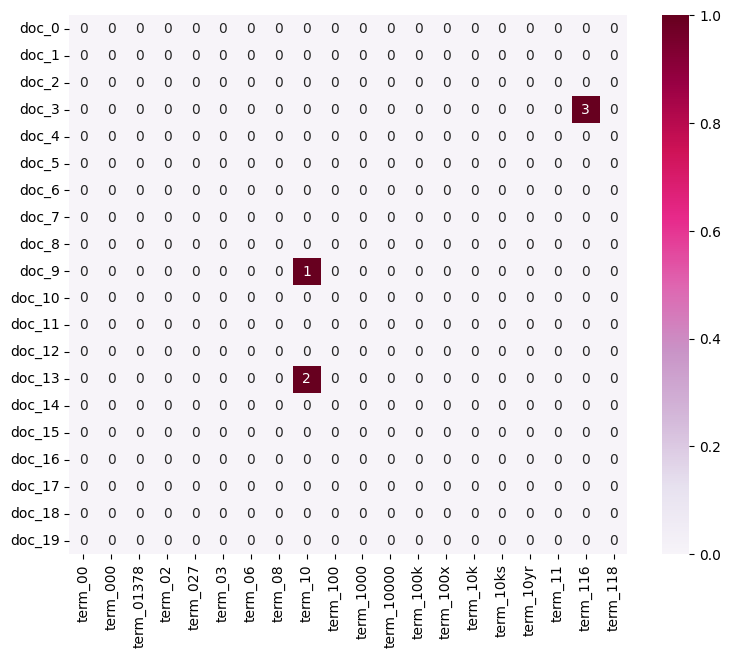

In [55]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

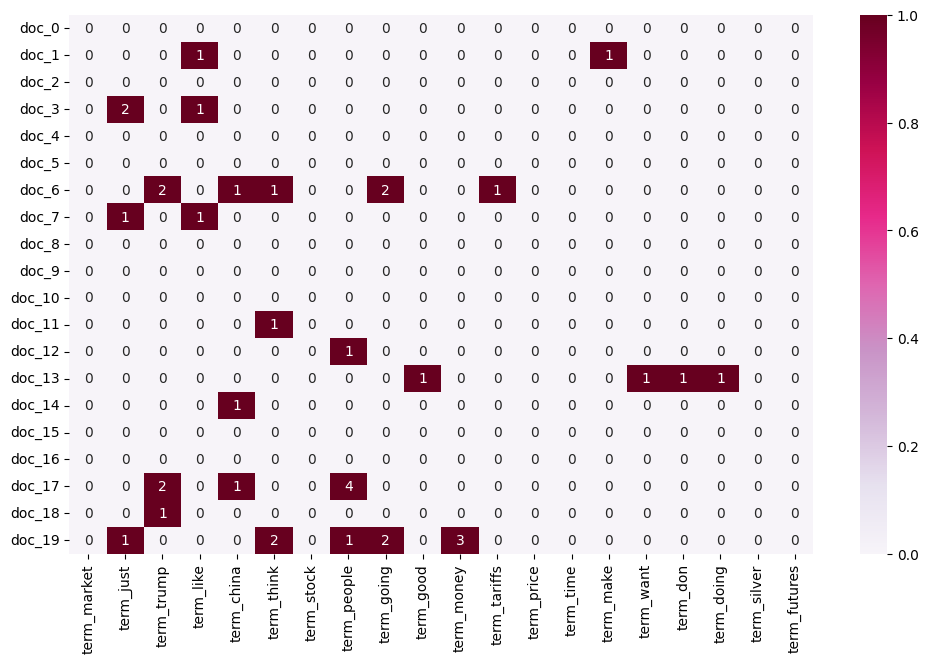

In [60]:
N = 20
term_frequencies = np.array(df_counts.sum(axis=0)).ravel()
top_idx = term_frequencies.argsort()[-N:][::-1]
plot_x = ["term_" + str(i) for i in count_vect.get_feature_names_out()[top_idx]]


M = 20
plot_y = ["doc_"+ str(i) for i in list(df.index)[0:M]]
plot_z = df_counts[0:M, top_idx].toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.figure(figsize=(12, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### Transform Text Data

In [62]:
term_frequencies = []
for j in range(0, df_counts.shape[1]):
    term_frequencies.append(sum(df_counts[:, j].toarray()))

term_frequencies = np.asarray(df_counts.sum(axis=0))[0]

/var/folders/kx/m437w_zn5rgfvvxgpk4hgq880000gn/T/ipykernel_2186/3480579971.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);


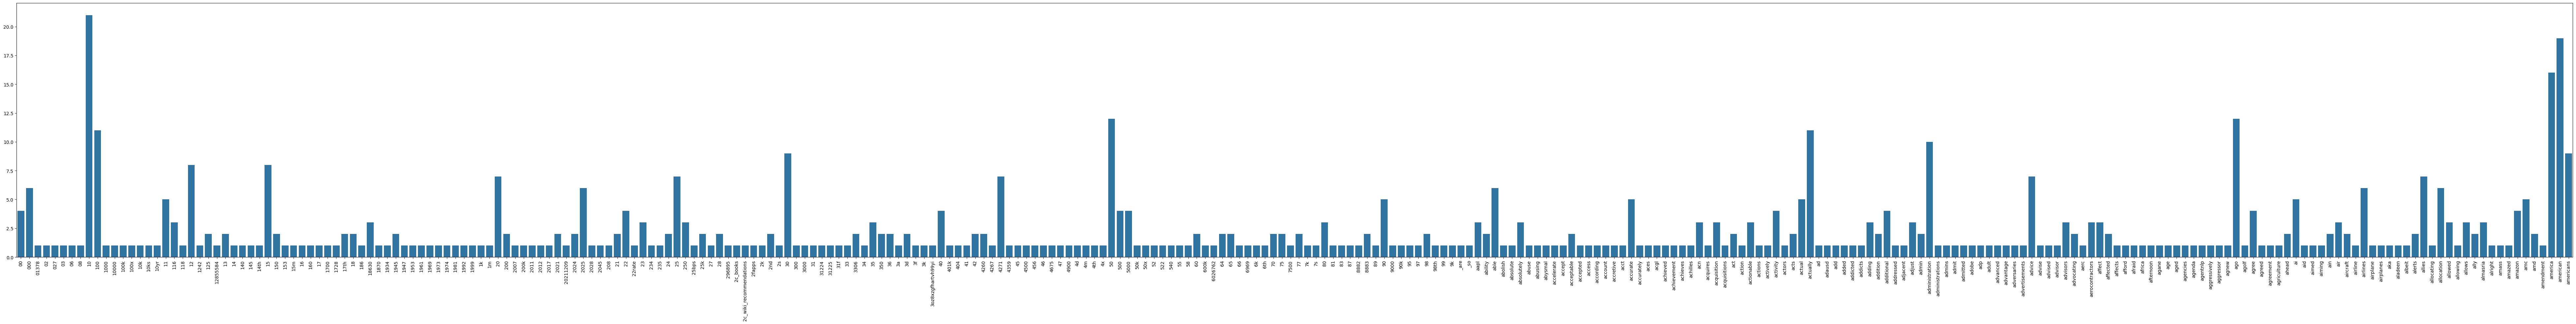

In [63]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

In [ ]:
import plotly.express as px

df_terms = pd.DataFrame({
    "term": count_vect.get_feature_names_out()[:300],
    "frequency": term_frequencies[:300]
})

fig = px.bar(df_terms, 
             x="term", 
             y="frequency",
             title="Top 300 Terms by Frequency",
             labels={"term": "Vocabulary Term", "frequency": "Frequency"})


fig.update_layout(xaxis_tickangle=-90, width=1200, height=500)

In [103]:
#We try to visualize Top-N most frequent terms
N = 50  # how many top terms to visualize
top_idx = term_frequencies.argsort()[-N:][::-1]

df_top = pd.DataFrame({
    "term": count_vect.get_feature_names_out()[top_idx],
    "frequency": term_frequencies[top_idx]
})

fig = px.bar(df_top, x="term", y="frequency",
             title=f"Top {N} Most Frequent Terms")
fig.update_layout(xaxis_tickangle=-90, width=1000, height=500)
fig.show()

Change the frequency into log scale

In [104]:
# Answer here
N = 50  # how many top terms to visualize
top_idx = term_frequencies.argsort()[-N:][::-1]

df_top = pd.DataFrame({
    "term": count_vect.get_feature_names_out()[top_idx],
    "frequency": np.log(term_frequencies[top_idx])
})

fig = px.bar(df_top, x="term", y="frequency",
             title=f"Top {N} Most Frequent Terms")
fig.update_layout(xaxis_tickangle=-90, width=1000, height=500)
fig.show()

## Most frequent term based on sentiment

The following is the new data visualization for the third part of phase 1

Step 1. Collect term frequencies into pandas data frame

In [ ]:
#Most frequent term based on sentiment
import plotly.express as px

N = 20  # Top N per sentiment
sentiments = df['sentiment'].unique()
print(sentiments)

df_top_sentiments = []

for s in sentiments:
    # Subset rows belonging to this sentiment
    mask = df['sentiment'] == s
    X_s = df_counts[mask]
    
    # Sum term frequencies
    term_freq_s = np.array(X_s.sum(axis=0)).ravel()
    top_idx_s = term_freq_s.argsort()[-N:][::-1]

    
    # Store results
    df_top_sentiments.append(pd.DataFrame({
        "sentiment": s,
        "term": count_vect.get_feature_names_out()[top_idx_s],
        "frequency": term_freq_s[top_idx_s]
    }))

df_top_sentiments = pd.concat(df_top_sentiments, ignore_index=True)

[-1.  1.  0.]
[36 26 24 20 19 17 17 17 16 15 15 14 12 10 10  9  9  9  9  8]
[73 50 49 46 43 42 35 29 28 27 26 26 25 24 23 22 22 20 19 18]
[23 20 19 17 17 13 13 12 11 10 10 10  9  9  8  8  8  8  8  8]


Step 2. Plot with plotly

In [89]:
fig = px.bar(df_top_sentiments,
             x="term", y="frequency",
             facet_col="sentiment",
             color="sentiment",
             facet_col_wrap=3,
             title=f"Top {N} Most Frequent Terms by Sentiment")

fig.update_layout(xaxis_tickangle=-90, width=1200, height=600)
fig.show()

# Phase 2

In [ ]:
### Begin Assignment Here